In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data

df = pd.read_csv('Cars.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


# For the feature owner, map First owner to 1, ...,Test Drive Car to 5

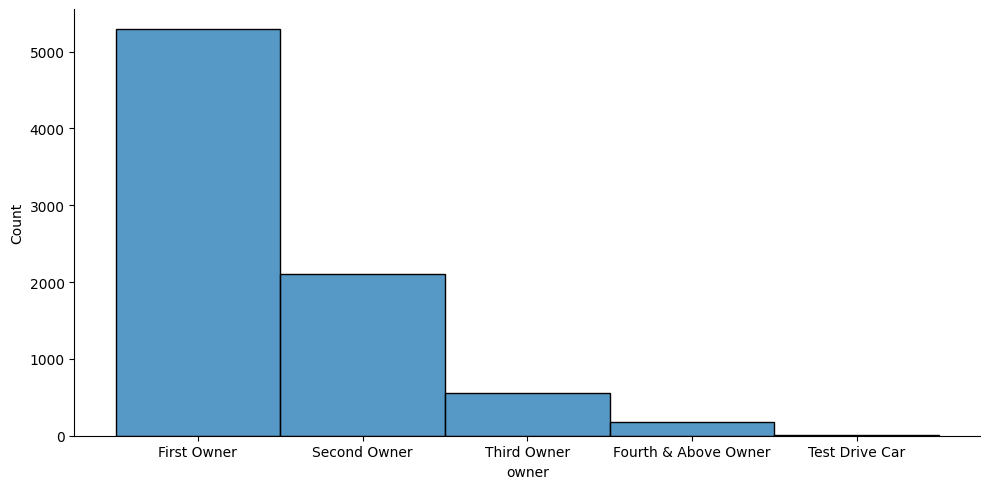

In [5]:
# displot of Owner to see how may features are there

sns.displot(df['owner'], aspect=2)  


In [6]:
# map feature / label encoding 

df['owner'] = df['owner'].map({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})

In [7]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

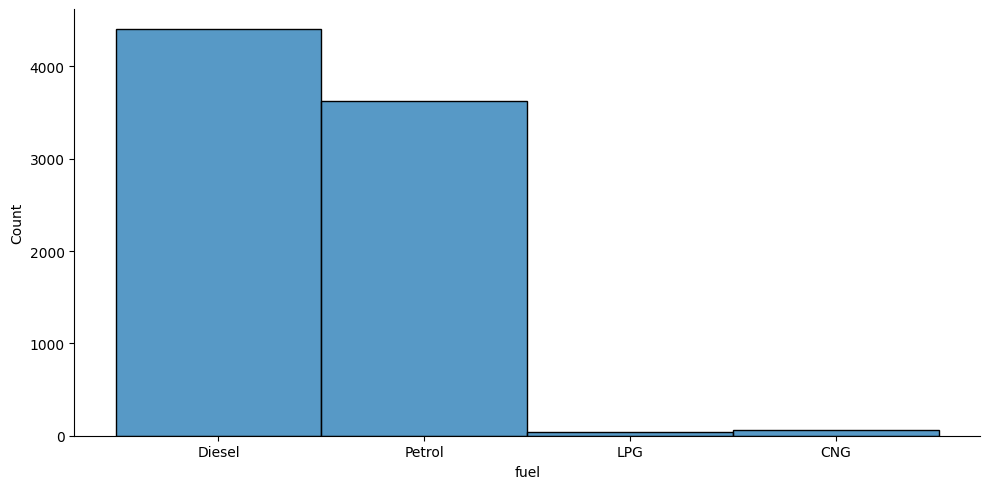

In [8]:
# displot fuel 

sns.displot(df['fuel'], aspect=2)

In [9]:
# remove all rows with LPG and CNG

df = df[df['fuel'].isin(['Petrol', 'Diesel'])]

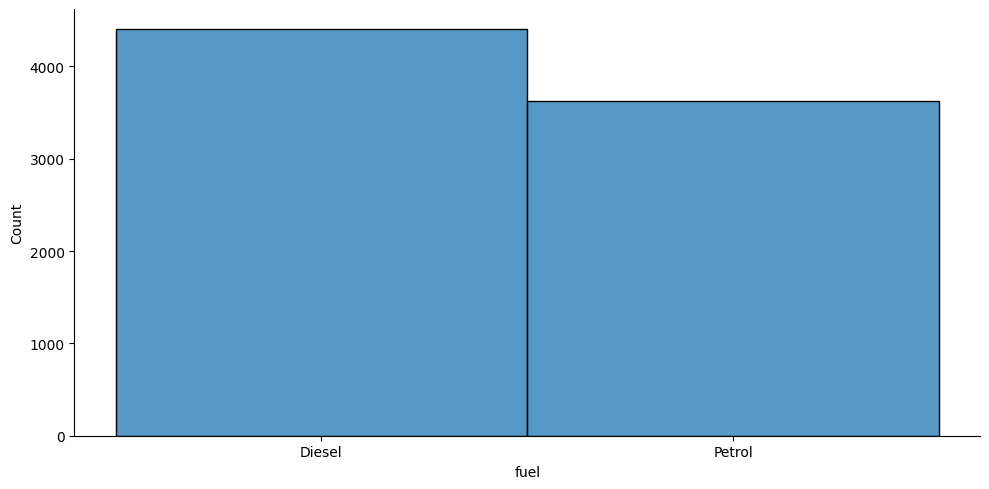

In [10]:
# comfirm removal

sns.displot(df['fuel'], aspect=2)

# For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float). Hint: usedf.mileage.str.split

In [11]:
# visualize mileage

df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [12]:
# remove kmpl and convert to float

df.loc[:, 'mileage'] = df['mileage'].str.replace('kmpl', '').astype(float)

In [13]:
df['mileage'].head()

0     23.4
1    21.14
2     17.7
3     23.0
4     16.1
Name: mileage, dtype: object

# For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

In [14]:
# visualize engine

df['engine'].head()

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
Name: engine, dtype: object

In [15]:
# remove cc and convert to float

df.loc[:, 'engine'] = df['engine'].str.replace('CC', '').astype(float)

In [16]:
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: object

# Do the same for max power

In [17]:
# visualize max power

df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [18]:
# remove bhp and convert to float

df.loc[:, 'max_power'] = df['max_power'].str.replace('bhp', '').astype(float)

In [19]:
df['max_power'].head()

0      74.0
1    103.52
2      78.0
3      90.0
4      88.2
Name: max_power, dtype: object

In [20]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4,1248.0,74.0,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7,1497.0,78.0,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0,1396.0,90.0,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1,1298.0,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


# For the feature brand, take only the first word and remove the rest

In [21]:
# visualize brand
# change name to brand

df.rename(columns = {'name': 'brand'}, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   object 
 9   engine         7819 non-null   object 
 10  max_power      7825 non-null   object 
 11  torque         7819 non-null   object 
 12  seats          7819 non-null   float64
dtypes: float64(1), int64(4), object(8)
memory usage: 878.6+ KB


In [23]:
# take only the first word of brand

df['brand'] = df['brand'].apply(lambda x: x.split(' ')[0])

In [24]:
df['brand'].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: brand, dtype: object

<Axes: xlabel='brand'>

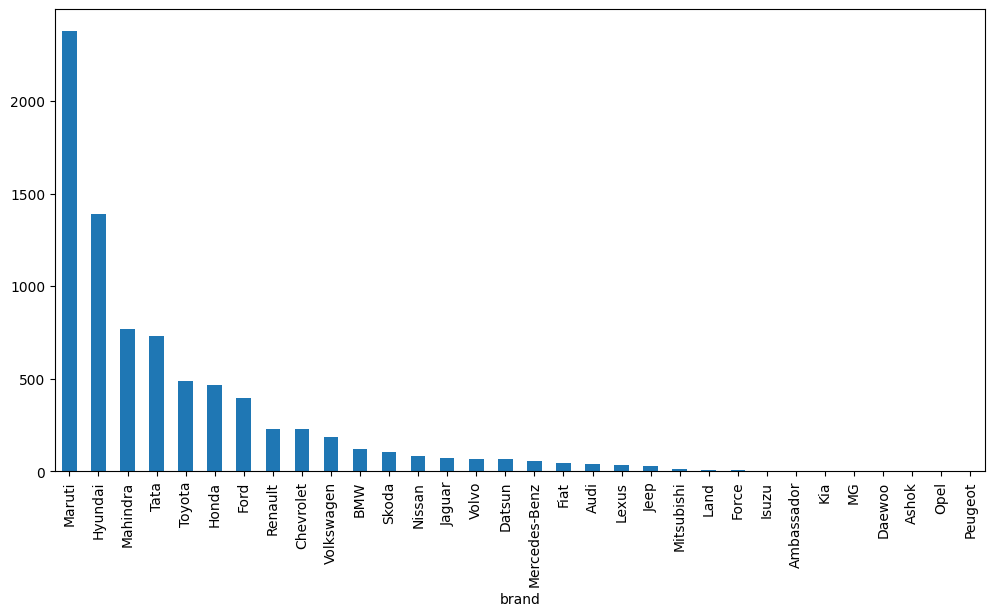

In [25]:
# displot of brand

df['brand'].value_counts().plot(kind='bar', figsize=(12,6))

In [26]:
# I can see some brands have very few cars. I would like to see the numbers

df['brand'].value_counts()

brand
Maruti           2378
Hyundai          1393
Mahindra          772
Tata              733
Toyota            488
Honda             467
Ford              397
Renault           228
Chevrolet         228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [27]:
# should I group them as others? or drop them? I will keep them for now.

# Drop the feature torque, simply because Chaky’s company does not understand well about it

In [28]:
# drop feature torque

df = df.drop(columns=['torque'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   object 
 9   engine         7819 non-null   object 
 10  max_power      7825 non-null   object 
 11  seats          7819 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 815.9+ KB


In [30]:
# EDA : a quick overview

df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4,1248.0,74.0,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7,1497.0,78.0,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0,1396.0,90.0,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1,1298.0,88.2,5.0


In [31]:
df.describe()

,year,selling_price,km_driven,owner,seats
count,8033.000000,8.033000e+03,8.033000e+03,8033.000000,7819.000000
mean,2013.818748,6.427361e+05,6.973882e+04,1.460227,5.421281
std,4.031655,8.098635e+05,5.664361e+04,0.720497,0.962876
min,1983.000000,2.999900e+04,1.000000e+03,1.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,1.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,2.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,5.000000,14.000000


In [32]:
# quick check for missig value

df.isnull().sum()

# I can see some mising value but I will contiue with EDA before dealing with them. At this point, my decision is to drop them as 
# they are not a big number.

brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

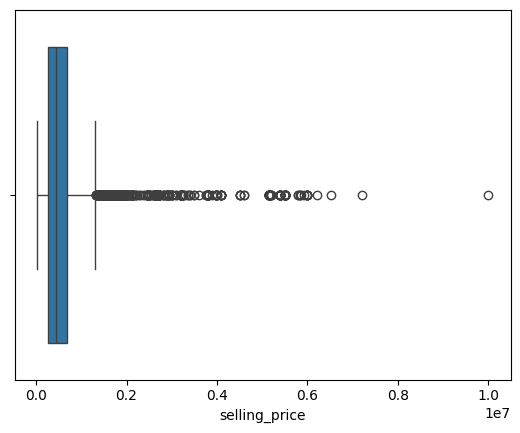

In [33]:
# let's see our target variable price

sns.boxplot(x=df['selling_price'])
plt.show()

In [34]:
# why have so many outliers? which is causing it? 

# first we need to convert categorical variable to numerical 

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   object 
 9   engine         7819 non-null   object 
 10  max_power      7825 non-null   object 
 11  seats          7819 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 815.9+ KB


In [35]:
# The facts that there are missing values in mileage, engine and max_power are making it impossible to convert, I will drop those missing vlues.

df.isnull().sum()

brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

In [36]:
# it's 200 out of 8000 anyways

df = df.dropna()

In [37]:
df.isnull().sum()

brand            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7819 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          7819 non-null   object 
 1   year           7819 non-null   int64  
 2   selling_price  7819 non-null   int64  
 3   km_driven      7819 non-null   int64  
 4   fuel           7819 non-null   object 
 5   seller_type    7819 non-null   object 
 6   transmission   7819 non-null   object 
 7   owner          7819 non-null   int64  
 8   mileage        7819 non-null   object 
 9   engine         7819 non-null   object 
 10  max_power      7819 non-null   object 
 11  seats          7819 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 794.1+ KB


In [39]:
# Now I can convert but since I remove kmpl, cc and bhp from mileage, engine and max_power respectively, I can convert them to float directly

df.loc[:, 'mileage'] = df['mileage'].astype(float)
df.loc[:, 'engine'] = df['engine'].astype(float)
df.loc[:, 'max_power'] = df['max_power'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7819 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          7819 non-null   object 
 1   year           7819 non-null   int64  
 2   selling_price  7819 non-null   int64  
 3   km_driven      7819 non-null   int64  
 4   fuel           7819 non-null   object 
 5   seller_type    7819 non-null   object 
 6   transmission   7819 non-null   object 
 7   owner          7819 non-null   int64  
 8   mileage        7819 non-null   object 
 9   engine         7819 non-null   object 
 10  max_power      7819 non-null   object 
 11  seats          7819 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 794.1+ KB


In [40]:
# Now how do I handle brand, feul, seller_type, transmission?
# For fuel, I already done a quick displot before and I can see there are only two types, Petrol and Diesel. I will use label encoding for this.

df['fuel'] = df['fuel'].map({'Petrol': 1, 'Diesel': 2})

In [41]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,2,Individual,Manual,1,23.4,1248.0,74.0,5.0
1,Skoda,2014,370000,120000,2,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,1,Individual,Manual,3,17.7,1497.0,78.0,5.0
3,Hyundai,2010,225000,127000,2,Individual,Manual,1,23.0,1396.0,90.0,5.0
4,Maruti,2007,130000,120000,1,Individual,Manual,1,16.1,1298.0,88.2,5.0


In [42]:
# let's see seller_type

df['seller_type'].value_counts()

seller_type
Individual          6477
Dealer              1106
Trustmark Dealer     236
Name: count, dtype: int64

In [43]:
# ok I will use label encoding for this as well

df['seller_type'] = df['seller_type'].map({'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3})
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,2,1,Manual,1,23.4,1248.0,74.0,5.0
1,Skoda,2014,370000,120000,2,1,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,1,1,Manual,3,17.7,1497.0,78.0,5.0
3,Hyundai,2010,225000,127000,2,1,Manual,1,23.0,1396.0,90.0,5.0
4,Maruti,2007,130000,120000,1,1,Manual,1,16.1,1298.0,88.2,5.0


In [44]:
# for transmission

df['transmission'].value_counts()

transmission
Manual       6778
Automatic    1041
Name: count, dtype: int64

In [45]:
# same as above, label encoding

df['transmission'] = df['transmission'].map({'Manual': 1, 'Automatic': 2})

In [46]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,2,1,1,1,23.4,1248.0,74.0,5.0
1,Skoda,2014,370000,120000,2,1,1,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,1,1,1,3,17.7,1497.0,78.0,5.0
3,Hyundai,2010,225000,127000,2,1,1,1,23.0,1396.0,90.0,5.0
4,Maruti,2007,130000,120000,1,1,1,1,16.1,1298.0,88.2,5.0


In [47]:
# now, let's address brand.

df['brand'].value_counts()

brand
Maruti           2301
Hyundai          1342
Mahindra          758
Tata              718
Honda             466
Toyota            452
Ford              388
Chevrolet         228
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Ashok               1
Opel                1
Name: count, dtype: int64

In [48]:
# let's put a threshold of 30. Any brand with less than 30 cars will be grouped as 'Other'

threshold = 30
brand_counts = df['brand'].value_counts()
rare_brands = brand_counts[brand_counts < threshold].index
df['brand'] = df['brand'].apply(lambda x: 'Other' if x in rare_brands else x)

In [49]:
df['brand'].value_counts()

brand
Maruti           2301
Hyundai          1342
Mahindra          758
Tata              718
Honda             466
Toyota            452
Ford              388
Renault           228
Chevrolet         228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Other              47
Fiat               41
Audi               40
Lexus              34
Jeep               31
Name: count, dtype: int64

In [50]:
# how do I encode brand now? One-hot will get too many features. I will use label encoding again

df['brand'] = df['brand'].astype('category').cat.codes # co-pilot suggested astype('category').cat.codes

# This converts brand colums to a pandas categorical type and cat.codes assigns a unique integer code to each category.
# Also let's see the mapping

brand_mapping = dict(enumerate(df['brand'].astype('category').cat.categories))
print(brand_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21}


In [51]:
df['brand'].value_counts()

brand
12    2301
7     1342
11     758
18     718
6      466
19     452
5      388
16     228
2      228
20     185
1      118
17     104
14      81
8       71
21      67
3       65
13      54
15      47
4       41
0       40
10      34
9       31
Name: count, dtype: int64

In [52]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,12,2014,450000,145500,2,1,1,1,23.4,1248.0,74.0,5.0
1,17,2014,370000,120000,2,1,1,2,21.14,1498.0,103.52,5.0
2,6,2006,158000,140000,1,1,1,3,17.7,1497.0,78.0,5.0
3,7,2010,225000,127000,2,1,1,1,23.0,1396.0,90.0,5.0
4,12,2007,130000,120000,1,1,1,1,16.1,1298.0,88.2,5.0


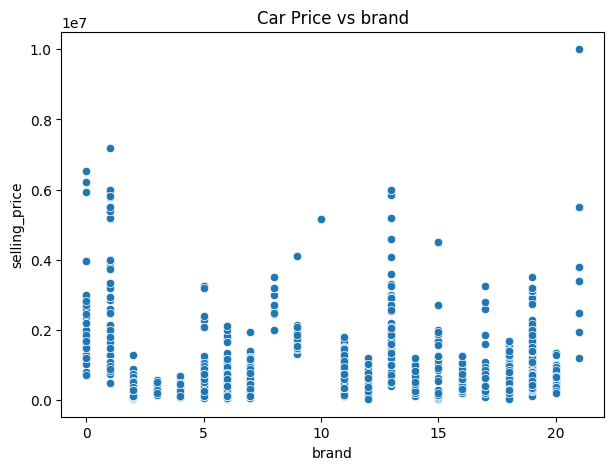

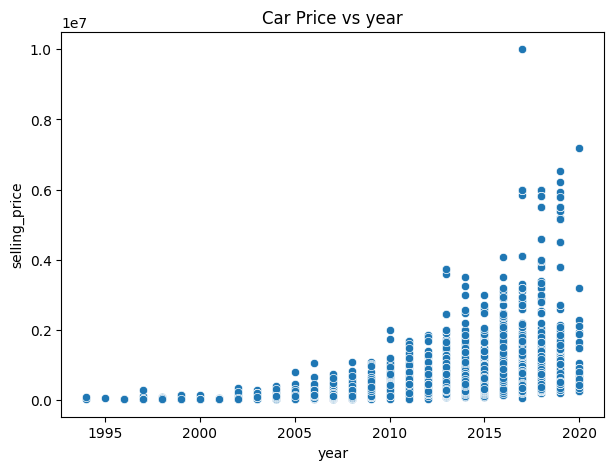

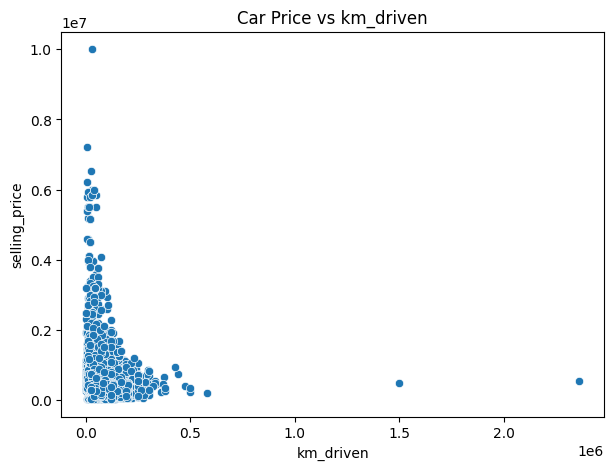

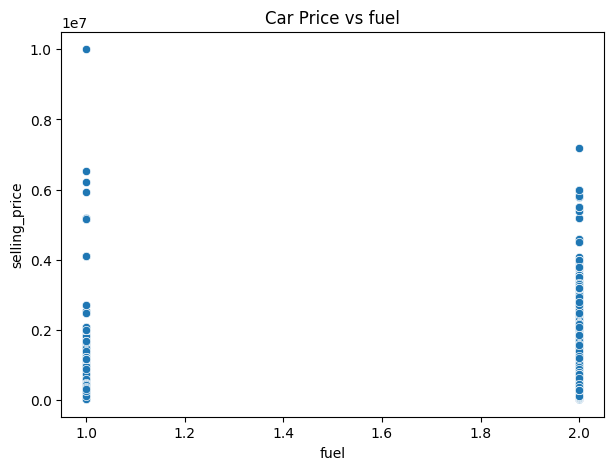

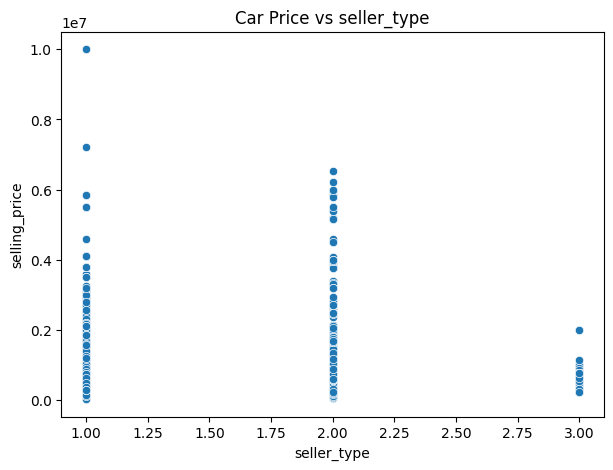

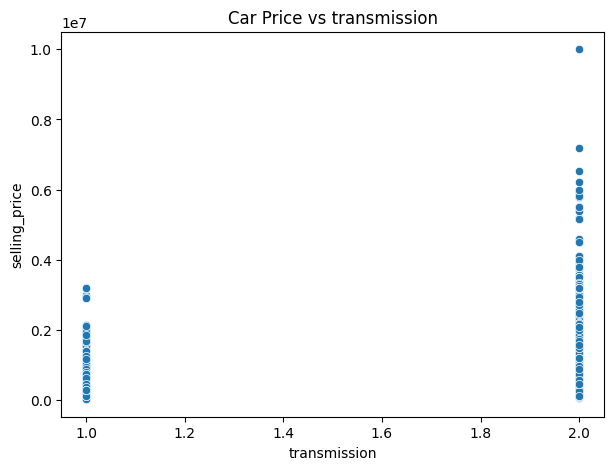

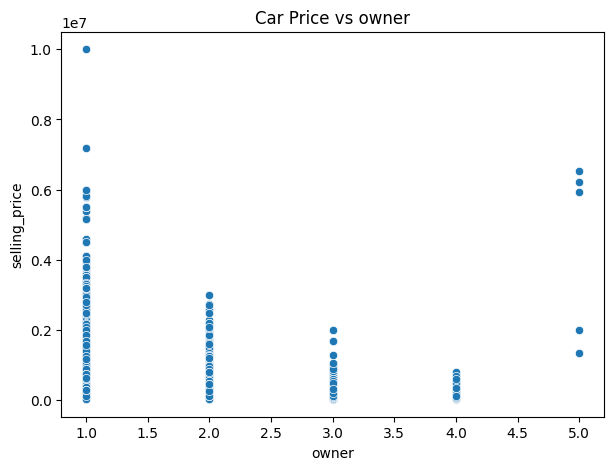

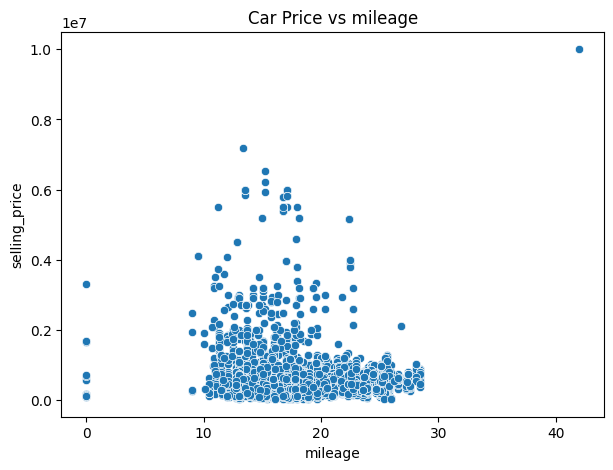

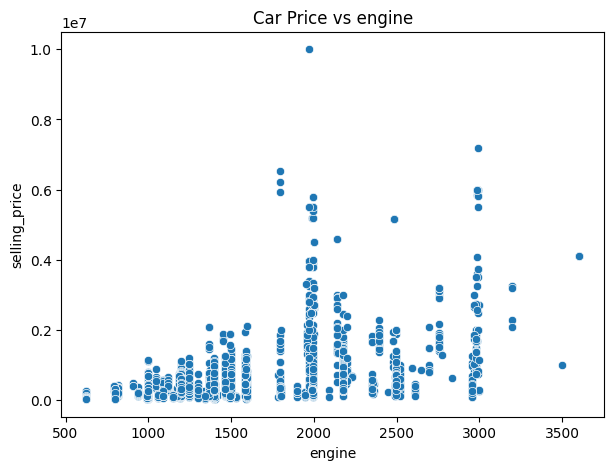

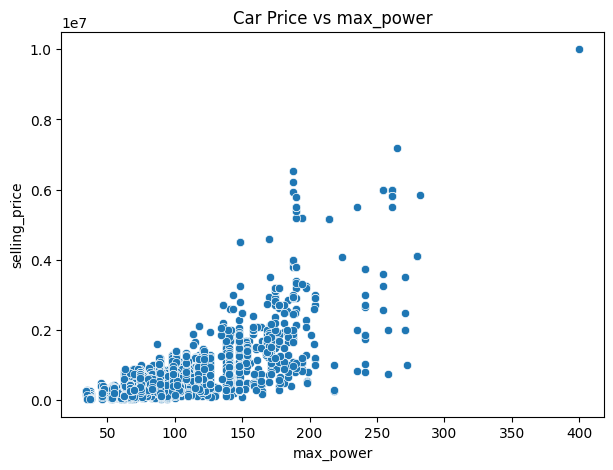

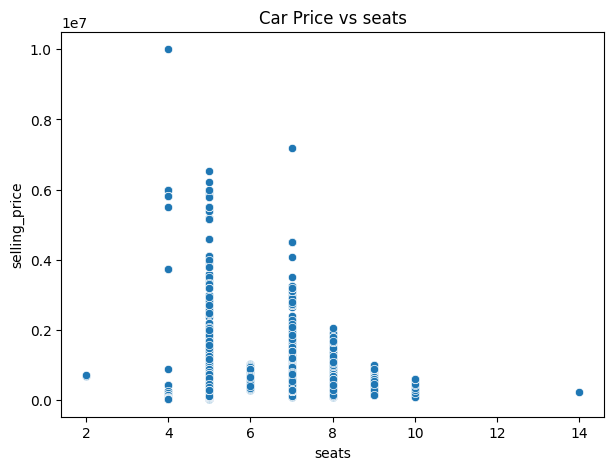

In [53]:
# What is causing high price? Let's see with scatter plot

features = ["brand", "year", "km_driven", "fuel", "seller_type",
       "transmission", "owner", "mileage", "engine", "max_power", "seats"]

for f in features:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=df[f], y=df["selling_price"])
    plt.title(f"Car Price vs {f}")
    plt.show()


# You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to involve this, we will simply delete all samples related to it.

In [54]:
# delete all samples with Test Drive Car

df = df[df['owner'] != 5]
df['owner'].value_counts()

owner
1    5165
2    1988
3     503
4     158
Name: count, dtype: int64

In [55]:
df.shape

(7814, 12)

In [56]:
df.isnull().sum()

brand            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

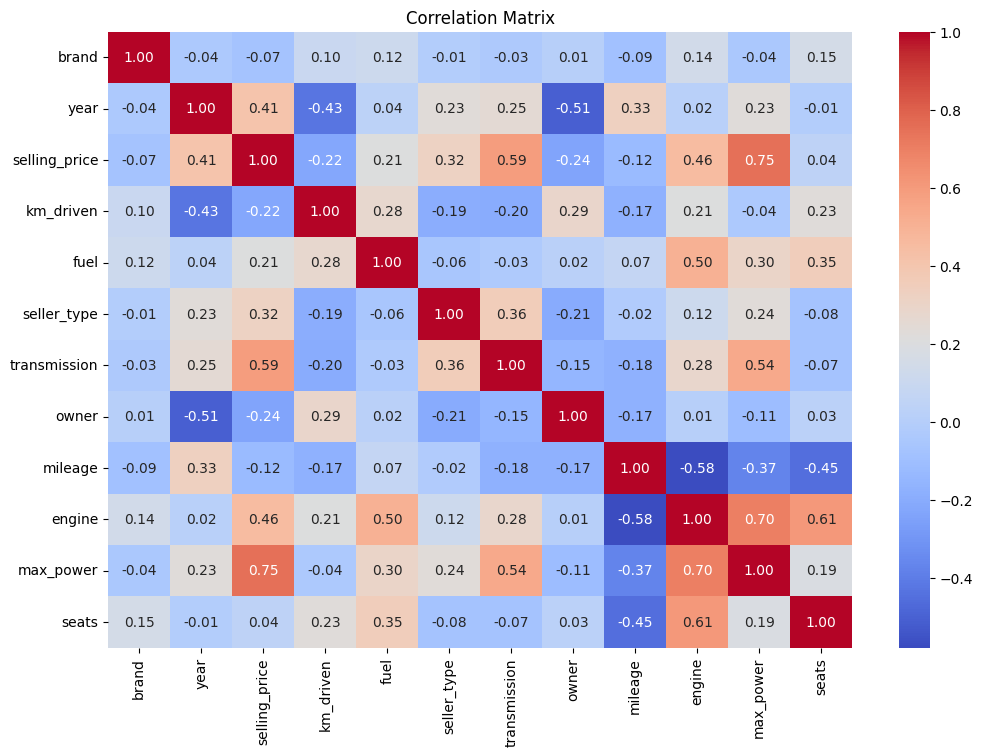

In [57]:
# now let's go see the correlation matrix.

plt.figure(figsize=(12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

In [58]:
# show correlation with price

correlation_with_price = correlation_matrix['selling_price'].sort_values(ascending=False)
print(correlation_with_price)

selling_price    1.000000
max_power        0.750428
transmission     0.588742
engine           0.456359
year             0.413231
seller_type      0.318370
fuel             0.205816
seats            0.041003
brand           -0.074423
mileage         -0.124062
km_driven       -0.221638
owner           -0.235333
Name: selling_price, dtype: float64


In [59]:
# remove features with low correlation with price (less than 0.1)

threshold = 0.1
correlation_with_price = correlation_matrix['selling_price']
columns_to_keep = correlation_with_price[correlation_with_price > threshold].index
df = df[columns_to_keep]
df.head()

,year,selling_price,fuel,seller_type,transmission,engine,max_power
0,2014,450000,2,1,1,1248.0,74.0
1,2014,370000,2,1,1,1498.0,103.52
2,2006,158000,1,1,1,1497.0,78.0
3,2010,225000,2,1,1,1396.0,90.0
4,2007,130000,1,1,1,1298.0,88.2


In [60]:
# all done now let's train, test and split

from sklearn.model_selection import train_test_split

X = df.drop(columns=['selling_price'])
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6251, 6), (1563, 6), (6251,), (1563,))

# Since selling price is a big number, it can cause your prediction to be very unstable. One trick is to first transform the label using log transform, i.e.,1y  =  np . log ( df ['selling_price'])

In [61]:
# log transform selling price 

y_train = np.log(y_train)

In [62]:
y_train.head()

1199    13.321214
6110    13.910821
3893    11.813030
6400    13.592367
4448    13.304685
Name: selling_price, dtype: float64

In [74]:
X_train.head()

,year,fuel,seller_type,transmission,engine,max_power
1199,2017,1,1,1,1197.0,81.8
6110,2017,2,1,2,1582.0,126.2
3893,2009,1,1,1,796.0,46.3
6400,2017,2,1,1,1498.0,98.59
4448,2015,1,1,1,1373.0,93.7


In [63]:
# Cross-Val through Regression Models

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

algorithms = [LinearRegression(), DecisionTreeRegressor(random_state = 0), RandomForestRegressor(n_estimators = 100, random_state = 0), SVR(), KNeighborsRegressor()]

algorithm_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNR']

In [64]:
y_train.isna().sum()

np.int64(0)

In [65]:
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse = []

kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.09466251 -0.09096601 -0.09256093 -0.09357559 -0.08116985]; Mean: -0.0905869757260204
Decision Tree - Score: [-0.06046365 -0.06265731 -0.06465474 -0.06315293 -0.05956992]; Mean: -0.062099709636623736
Random Forest - Score: [-0.05015629 -0.05238799 -0.04490023 -0.05552766 -0.05008991]; Mean: -0.05061241510713974
SVR - Score: [-0.34278686 -0.32018439 -0.34166755 -0.33400655 -0.3289248 ]; Mean: -0.333514029624444
KNR - Score: [-0.06002288 -0.06140393 -0.05597695 -0.06871386 -0.06390815]; Mean: -0.06200515471872026


# Random Forest is the best model ATP

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train)

,estimator,RandomForestR...andom_state=1)
,param_grid,"{'bootstrap': [True], 'max_depth': [5, 10, ...], 'n_estimators': [5, 6, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,15


In [67]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [68]:
best_mse = grid.best_score_
best_mse

np.float64(-0.05053970579010379)

In [69]:
#Testing

from sklearn.metrics import mean_squared_error, r2_score

yhat = grid.predict(X_test)
yhat = np.exp(yhat)  # reverse log transform
print("MSE: ", mean_squared_error(y_test, yhat))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, yhat)))
print("R2: ", r2_score(y_test, yhat))

MSE:  17158664148.739103
RMSE:  130991.08423377182
R2:  0.9746440223038749


In [70]:
# Feature Importance Analysis

rf = grid.best_estimator_
rf.feature_importances_

array([0.44044394, 0.00537149, 0.00333993, 0.00383403, 0.06874794,
       0.47826268])

<BarContainer object of 6 artists>

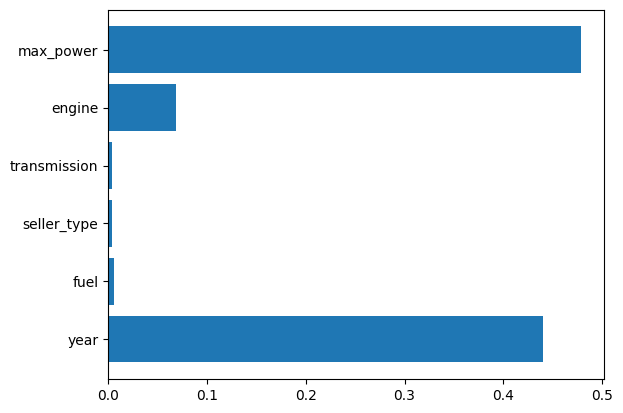

In [71]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

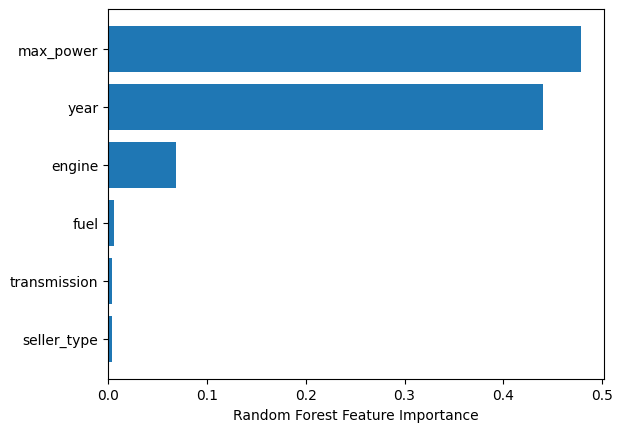

In [72]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Report
# 1. Feature Importance

From the feature importance graph, the most important factor in predicting car price is max_power, followed by year and engine.

Max Power:
This makes sense because cars with higher power need bigger engines and better parts, which makes them more expensive.

Year:
Newer cars usually cost more than older cars. The year of manufacture can roughly show how much a car is worth.

Engine:
Engine is third, but its importance is much lower than max_power and year. This shows that engine size matters, but it is not as important as power or car age.

# 2. Algorithm Performance

These are the algorithms I used to compare:

Linear Regression

Decision Tree Regressor

Random Forest Regressor

Support Vector Regressor (SVR)

KNeighbors Regressor (KNR)

Out of all five, Random Forest Regressor works the best with an R² score of 0.97. Based on my research, here is how each algorithm performed:

Linear Regression:
It does poorly because it assumes a straight-line relationship between features and price. Not all features affect price in a straight-line way.

Decision Tree Regressor:
Tree models do okay, but a single tree can overfit and not work well on new data.

Random Forest Regressor:
This is the best model. It combines many trees, so it can handle non-linear relationships and is less affected by outliers.

SVR and KNR:
These two are the worst. SVR works better with small, clean data. KNR has problems because it averages nearby points and the data has many features.

In [ ]:
# import joblib

# # Save the trained Random Forest model
# joblib.dump(grid.best_estimator_, 'model.pkl')
# print("Model saved as 'model.pkl'")